In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import numpy as np
import polars.selectors as cs

In [2]:
df = pd.read_excel("../dano_base.xlsx")
df

,Unnamed: 0,application_id,primary_income_dt,party_rk,product_code,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,...,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
0,0,3379c95477164e679ef80291a36a50ec,2023-03-05,772887927.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2e23732fef4749e1ae7a89ec978b7bf7,2023-03-05,858351423.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,df795c04bd834c0d8a2960d3b0593938,2023-03-09,864683115.0,DCV,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,7c2512d6bf2d47fe91eefc75f8062698,2023-03-13,294312227.0,DCV,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,ca547a88dd0c42f2a50657af01b87317,2023-03-03,815163498.0,DCV,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73707,73707,8168937fbe4c447ca420614d4e032d94,2023-03-14,380072334.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73708,73708,18de6aaefd9c478a9a2f7a04750e3d56,2023-03-21,941415613.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73709,73709,f03232cd563044f299b400a49ad95534,2023-03-03,863738223.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
73710,73710,269435523adf4ec79361fa9fec903967,2023-03-09,956387021.0,DCV,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

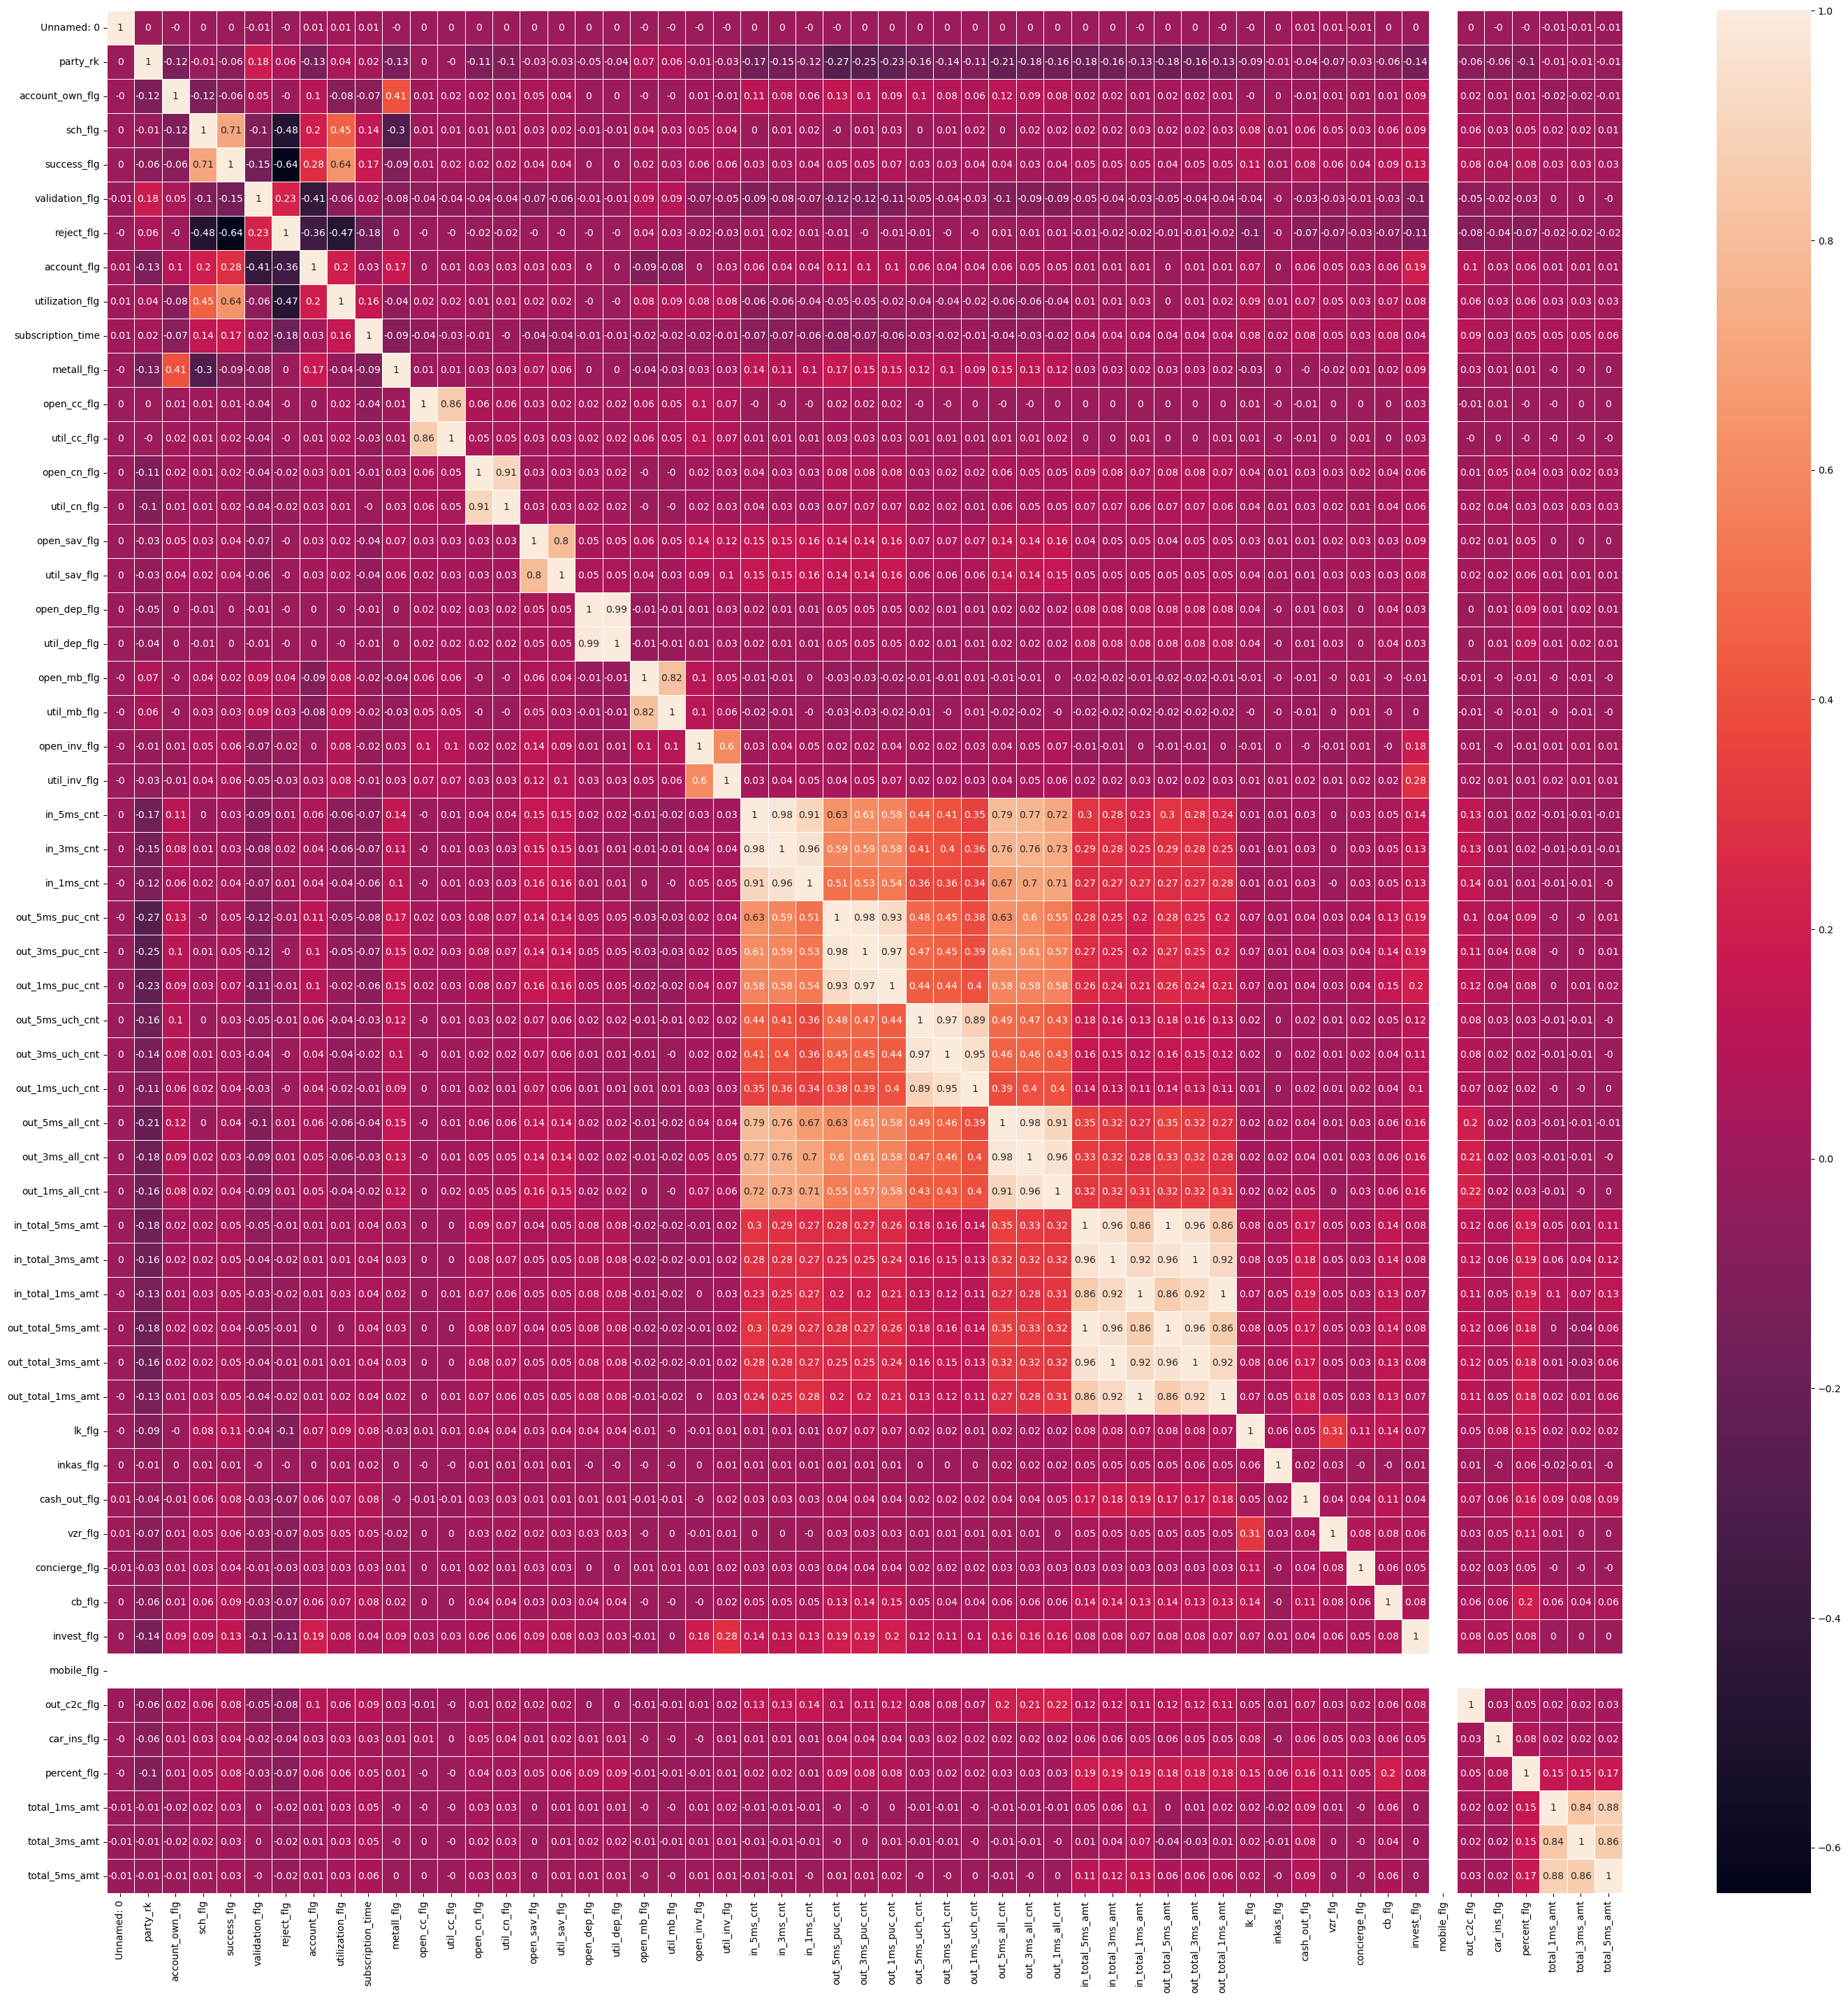

In [3]:
fig, ax = plt.subplots(figsize=(35, 35))  # Sample figsize in inches
sns.heatmap(
    pl.from_pandas(df).with_columns(
        (pl.col("in_total_1ms_amt") - pl.col("out_total_1ms_amt")).alias(
            "total_1ms_amt"
        ),
        (pl.col("in_total_3ms_amt") - pl.col("out_total_3ms_amt")).alias(
            "total_3ms_amt"
        ),
        (pl.col("in_total_5ms_amt") - pl.col("out_total_5ms_amt")).alias(
            "total_5ms_amt"
        ),
    )
    .to_pandas()
    .corr(numeric_only=True)
    .round(2),
    annot=True,
    linewidths=0.5,
    fmt="g",
)